In [ ]:
import pandas as pd

# Load the dataset (replace 'path_to_your_dataset' with the actual file path)
df = pd.read_csv('/content/sample_data/data_telco_customer_churn.csv')

# Convert the 'Churn' column to binary
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Convert categorical variables to dummy/one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Check the first few rows to ensure conversion worked
df.head()


,tenure,MonthlyCharges,Churn,Dependents_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,InternetService_Fiber optic,InternetService_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes
0,9,72.90,1,True,False,False,False,False,False,False,False,True,False,True,False,False,True
1,14,82.65,0,False,False,False,False,True,True,False,False,True,False,False,False,False,True
2,64,47.85,1,False,False,True,False,False,False,False,False,True,False,True,False,True,False
3,72,69.65,0,False,False,True,False,True,False,False,False,True,False,True,False,True,False
4,3,23.60,0,False,True,False,True,False,False,True,True,False,True,False,False,False,True


In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 77.35%
Confusion Matrix:
[[940 121]
 [214 204]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1061
           1       0.63      0.49      0.55       418

    accuracy                           0.77      1479
   macro avg       0.72      0.69      0.70      1479
weighted avg       0.76      0.77      0.76      1479



Feature Importance Ranking:

1. MonthlyCharges       (Importance: 0.3624)
2. tenure               (Importance: 0.3200)
3. InternetService_Fiber optic (Importance: 0.0534)
4. Contract_Two year    (Importance: 0.0386)
5. Contract_One year    (Importance: 0.0358)
6. OnlineSecurity_Yes   (Importance: 0.0321)
7. PaperlessBilling_Yes (Importance: 0.0268)
8. OnlineBackup_Yes     (Importance: 0.0260)
9. TechSupport_Yes      (Importance: 0.0254)
10. Dependents_Yes       (Importance: 0.0253)
11. DeviceProtection_Yes (Importance: 0.0228)
12. DeviceProtection_No internet service (Importance: 0.0079)
13. OnlineSecurity_No internet service (Importance: 0.0072)
14. TechSupport_No internet service (Importance: 0.0062)
15. InternetService_No   (Importance: 0.0057)
16. OnlineBackup_No internet service (Importance: 0.0045)


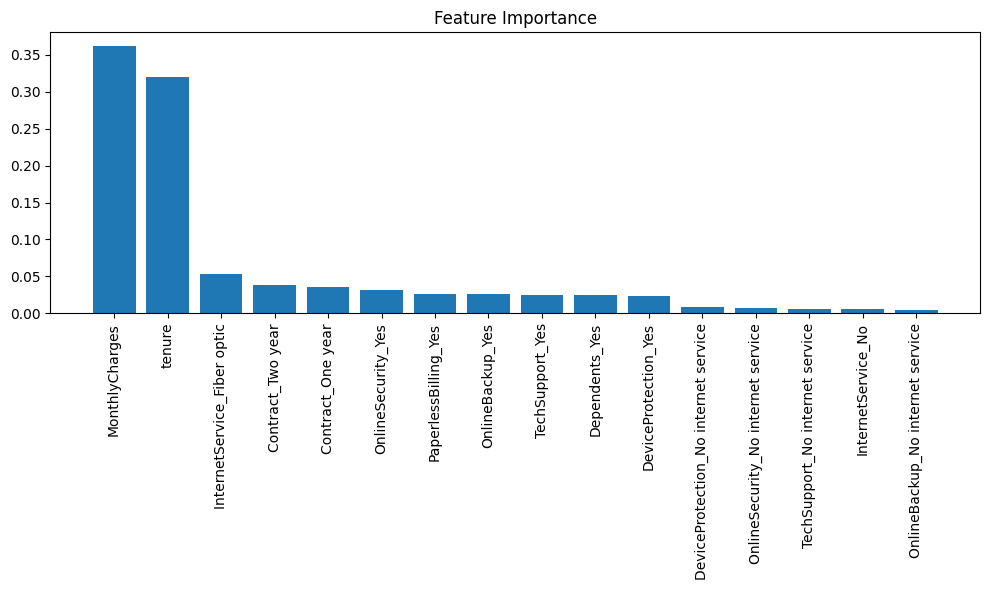

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get the feature importances from the model
importances = model.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature Importance Ranking:\n")
for i in range(X.shape[1]):
    print(f"{i + 1}. {X.columns[indices[i]]:<20} (Importance: {importances[indices[i]]:.4f})")

# Visualize the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)

# Print cross-validation scores
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean()}")


Cross-validation scores: [0.79107505 0.77890467 0.7494929  0.75557809 0.78296146]
Mean CV score: 0.7716024340770791
